In [1]:
import pydicom as dicom
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
import cv2
import glob

### VIEWING FIRST IMAGE

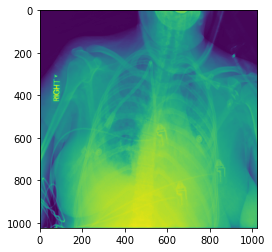

In [56]:
image_path = 'C:/Users/INSUKAL2/AIML/Capstone/stage_2_train_images/000db696-cf54-4385-b10b-6b16fbb3f985.dcm'
ds = dicom.dcmread(image_path)
plt.imshow(ds.pixel_array)

### DCM FILE TO JPG CONVERSION (NOT USED)

In [16]:
#image_path = '/Users/INSUKAL2/AIML/Capstone/stage_2_train_images'
#ds = dicom.dcmread(image_path)
#pixel_array_numpy = ds.pixel_array
#image_format = '.jpg' # or '.png'
#image_path = image_path.replace('.dcm', image_format)
#cv2.imwrite(image_path, pixel_array_numpy)

### DCM FILE TO NUMPY CONVERSION 

In [5]:
Image_Directory = 'C:/Users/INSUKAL2/AIML/Capstone/stage_2_train_images'
X_train_data = [] # EMPTY LIST FOR STORING THE IMAGE
image_name=[]    # IMAGE NAME WILL BE STORED
for i in os.listdir(Image_Directory):
    #print(i)
    ds = dicom.dcmread(f"C:/Users/INSUKAL2/AIML/Capstone/stage_2_train_images/{i}")
    pixel_array_numpy = ds.pixel_array
    X_train_data.append(pixel_array_numpy)
    image_name.append(i)

In [6]:
X_train_data[2]

array([[  1,   1,   2, ...,   2,   1,   0],
       [  2,   2,   2, ...,   4,   3,   2],
       [  2,   3,   3, ...,   5,   4,   3],
       ...,
       [ 52,  80,  62, ..., 140, 143,  80],
       [ 60,  88,  72, ..., 136, 138,  84],
       [ 27,  49,  37, ...,  64,  75,  36]], dtype=uint8)

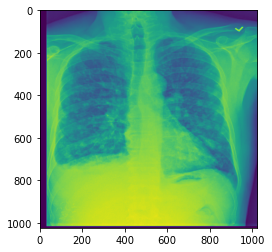

In [8]:
plt.imshow(X_train_data[4])

### RESIZING THE IMAGE

In [9]:
len(X_train_data)

26684

In [11]:
resize_image=[]   #empty list to store reshaped image
for i in range(len(X_train_data)):  
    image=cv2.resize(X_train_data[i], (224,224)) #resizing the image
    resize_image.append(image)

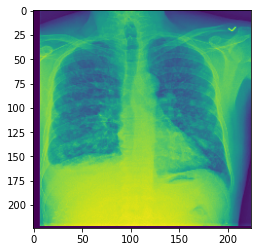

In [12]:
plt.imshow(resize_image[4])

In [13]:
resize_image=np.array(resize_image) # converting to numpy array

In [15]:
resize_image.shape

(26684, 224, 224)

In [37]:
image_name

['0004cfab-14fd-4e49-80ba-63a80b6bddd6.dcm',
 '000924cf-0f8d-42bd-9158-1af53881a557.dcm',
 '000db696-cf54-4385-b10b-6b16fbb3f985.dcm',
 '000fe35a-2649-43d4-b027-e67796d412e0.dcm',
 '001031d9-f904-4a23-b3e5-2c088acd19c6.dcm',
 '0010f549-b242-4e94-87a8-57d79de215fc.dcm',
 '001916b8-3d30-4935-a5d1-8eaddb1646cd.dcm',
 '0022073f-cec8-42ec-ab5f-bc2314649235.dcm',
 '0022995a-45eb-4cfa-9a59-cd15f5196c64.dcm',
 '0025d2de-bd78-4d36-9f72-e15a5e22ca82.dcm',
 '00293de0-a530-41dc-9621-0b3def01d06d.dcm',
 '002c591d-df62-4e34-8eda-838c664430a9.dcm',
 '002cb550-2e31-42f1-a29d-fbc279977e71.dcm',
 '00313ee0-9eaa-42f4-b0ab-c148ed3241cd.dcm',
 '00322d4d-1c29-4943-afc9-b6754be640eb.dcm',
 '003d8fa0-6bf1-40ed-b54c-ac657f8495c5.dcm',
 '00436515-870c-4b36-a041-de91049b9ab4.dcm',
 '0049f7b2-229b-4a46-91a3-0e321a3ca80a.dcm',
 '0053ee32-1e03-4dc2-a103-f46ad0448787.dcm',
 '00569f44-917d-4c86-a842-81832af98c30.dcm',
 '005f5517-ab76-4b0d-8a26-f808d97171c4.dcm',
 '0067d70b-0e6d-41ff-a9b8-8edf6d5e25e4.dcm',
 '006cec2e

In [38]:
# split each element in list and keep first part amd remove .dcm
image_name1 = [item.split('.', 1)[0] for item in image_name]
image_name1

['0004cfab-14fd-4e49-80ba-63a80b6bddd6',
 '000924cf-0f8d-42bd-9158-1af53881a557',
 '000db696-cf54-4385-b10b-6b16fbb3f985',
 '000fe35a-2649-43d4-b027-e67796d412e0',
 '001031d9-f904-4a23-b3e5-2c088acd19c6',
 '0010f549-b242-4e94-87a8-57d79de215fc',
 '001916b8-3d30-4935-a5d1-8eaddb1646cd',
 '0022073f-cec8-42ec-ab5f-bc2314649235',
 '0022995a-45eb-4cfa-9a59-cd15f5196c64',
 '0025d2de-bd78-4d36-9f72-e15a5e22ca82',
 '00293de0-a530-41dc-9621-0b3def01d06d',
 '002c591d-df62-4e34-8eda-838c664430a9',
 '002cb550-2e31-42f1-a29d-fbc279977e71',
 '00313ee0-9eaa-42f4-b0ab-c148ed3241cd',
 '00322d4d-1c29-4943-afc9-b6754be640eb',
 '003d8fa0-6bf1-40ed-b54c-ac657f8495c5',
 '00436515-870c-4b36-a041-de91049b9ab4',
 '0049f7b2-229b-4a46-91a3-0e321a3ca80a',
 '0053ee32-1e03-4dc2-a103-f46ad0448787',
 '00569f44-917d-4c86-a842-81832af98c30',
 '005f5517-ab76-4b0d-8a26-f808d97171c4',
 '0067d70b-0e6d-41ff-a9b8-8edf6d5e25e4',
 '006cec2e-6ce2-4549-bffa-eadfcd1e9970',
 '006e75c8-1fd9-4a5a-99e7-285addebed55',
 '00704310-78a8-

In [39]:
image_name2=pd.DataFrame(image_name1)  #converting list to dataframe
image_name2 = image_name2.rename(columns={0: 'patient_id'}) #renaming the column name
image_name2           #printing the dataframe

,patient_id
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6
1,000924cf-0f8d-42bd-9158-1af53881a557
2,000db696-cf54-4385-b10b-6b16fbb3f985
3,000fe35a-2649-43d4-b027-e67796d412e0
4,001031d9-f904-4a23-b3e5-2c088acd19c6
...,...
26679,fffb2395-8edd-4954-8a89-ffe2fd329be3
26680,fffba05a-1635-4545-9bbd-57ad4cfe8d27
26681,fffc95b5-605b-4226-80ab-62caec682b22
26682,fffcff11-d018-4414-971a-a7cefa327795


### LABEL DATA

In [41]:
label=pd.read_csv('stage_2_train_labels.csv')

In [42]:
label

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
...,...,...,...,...,...,...
30222,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,185.0,298.0,228.0,379.0,1
30223,c1edf42b-5958-47ff-a1e7-4f23d99583ba,NaN,NaN,NaN,NaN,0
30224,c1f6b555-2eb1-4231-98f6-50a963976431,NaN,NaN,NaN,NaN,0
30225,c1f7889a-9ea9-4acb-b64c-b737c929599a,570.0,393.0,261.0,345.0,1


In [43]:
label['Target'].value_counts()

0    20672
1     9555
Name: Target, dtype: int64

In [44]:
label1=pd.read_csv('stage_2_detailed_class_info.csv')

In [45]:
label1

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity
...,...,...
30222,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,Lung Opacity
30223,c1edf42b-5958-47ff-a1e7-4f23d99583ba,Normal
30224,c1f6b555-2eb1-4231-98f6-50a963976431,Normal
30225,c1f7889a-9ea9-4acb-b64c-b737c929599a,Lung Opacity


In [46]:
label1['class'].value_counts()

No Lung Opacity / Not Normal    11821
Lung Opacity                     9555
Normal                           8851
Name: class, dtype: int64

In [47]:
label2=pd.read_csv('stage_2_sample_submission.csv')

In [48]:
label2

,patientId,PredictionString
0,0000a175-0e68-4ca4-b1af-167204a7e0bc,0.5 0 0 100 100
1,0005d3cc-3c3f-40b9-93c3-46231c3eb813,0.5 0 0 100 100
2,000686d7-f4fc-448d-97a0-44fa9c5d3aa6,0.5 0 0 100 100
3,000e3a7d-c0ca-4349-bb26-5af2d8993c3d,0.5 0 0 100 100
4,00100a24-854d-423d-a092-edcf6179e061,0.5 0 0 100 100
...,...,...
2995,c1e88810-9e4e-4f39-9306-8d314bfc1ff1,0.5 0 0 100 100
2996,c1ec035b-377b-416c-a281-f868b7c9b6c3,0.5 0 0 100 100
2997,c1ef5b66-0fd7-49d1-ae6b-5af84929414b,0.5 0 0 100 100
2998,c1ef6724-f95f-40f1-b25b-de806d9bc39d,0.5 0 0 100 100


#### CHECKING THE TRAIN IMAGE NAME IS APPEARING IN THE LIST OR NOT

In [49]:
label['Extracted_New'] = label['patientId'].isin(image_name1)

In [50]:
label

,patientId,x,y,width,height,Target,Extracted_New
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,True
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,True
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,True
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,True
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,True
...,...,...,...,...,...,...,...
30222,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,185.0,298.0,228.0,379.0,1,True
30223,c1edf42b-5958-47ff-a1e7-4f23d99583ba,NaN,NaN,NaN,NaN,0,True
30224,c1f6b555-2eb1-4231-98f6-50a963976431,NaN,NaN,NaN,NaN,0,True
30225,c1f7889a-9ea9-4acb-b64c-b737c929599a,570.0,393.0,261.0,345.0,1,True


In [51]:
label_filtered= label[label['Extracted_New'] == True]

In [54]:
label_filtered['Extracted_New'].value_counts()

True    30227
Name: Extracted_New, dtype: int64

#### MAPPING THE TRAIN IMAGE WITH ITS CLASS

In [ ]:
tag=[]
for i in range(image_name2.shape[0]):
    if 